In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow,imsave

<IPython.core.display.Javascript object>


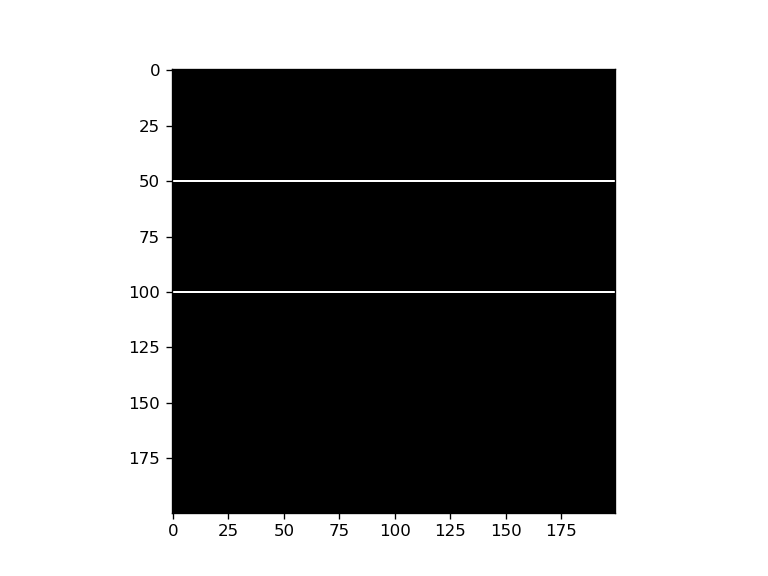

In [10]:
from skimage.transform import hough_line,hough_line_peaks

im_fake = np.zeros((200,200))
im_fake[50,:] = 1
im_fake[100,:] = 1
plt.figure()
plt.gray()
plt.imshow(im_fake)
plt.show()

[200 200] [90. 90.] [100.67787611  50.58938053]


<IPython.core.display.Javascript object>


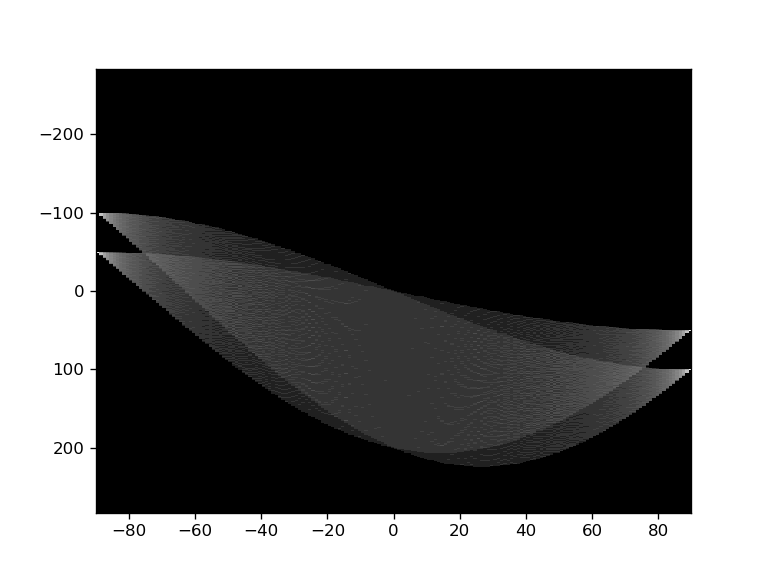

In [11]:
h, theta, d = hough_line(im_fake)
hpeaks, angles, dists = hough_line_peaks(h, theta, d)
print(hpeaks, np.rad2deg(angles), dists)
plt.figure()
plt.imshow(np.log(h+1), extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]], aspect='auto')
plt.show()

<IPython.core.display.Javascript object>


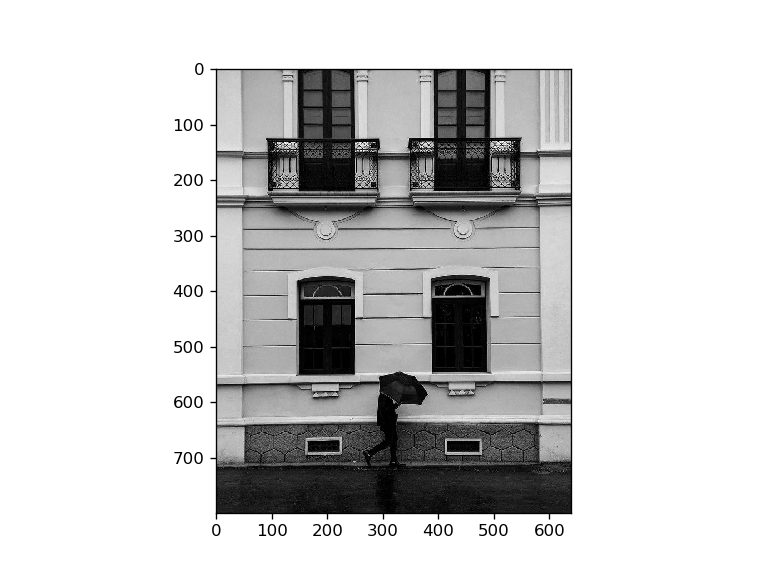

In [12]:
im = imread('walking.jpg')
plt.figure()
plt.gray()
plt.imshow(im)
plt.show()

<IPython.core.display.Javascript object>


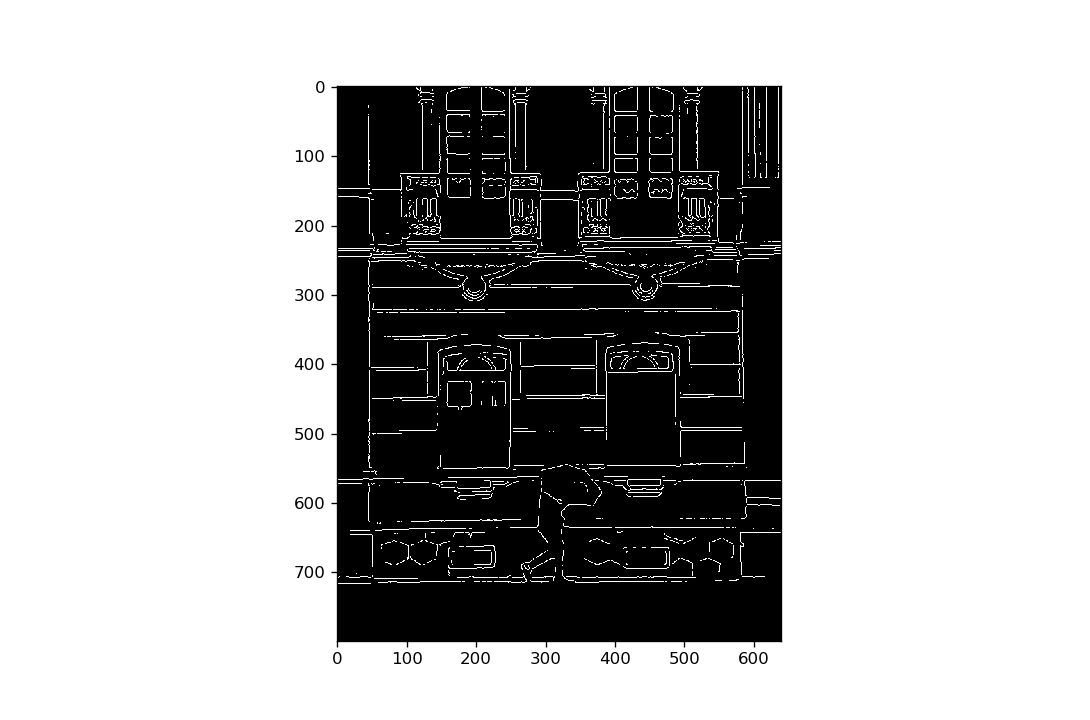

In [13]:
from skimage.feature import canny

borders = canny(im, sigma=2)

plt.figure()
plt.imshow(borders)
plt.show()

<IPython.core.display.Javascript object>


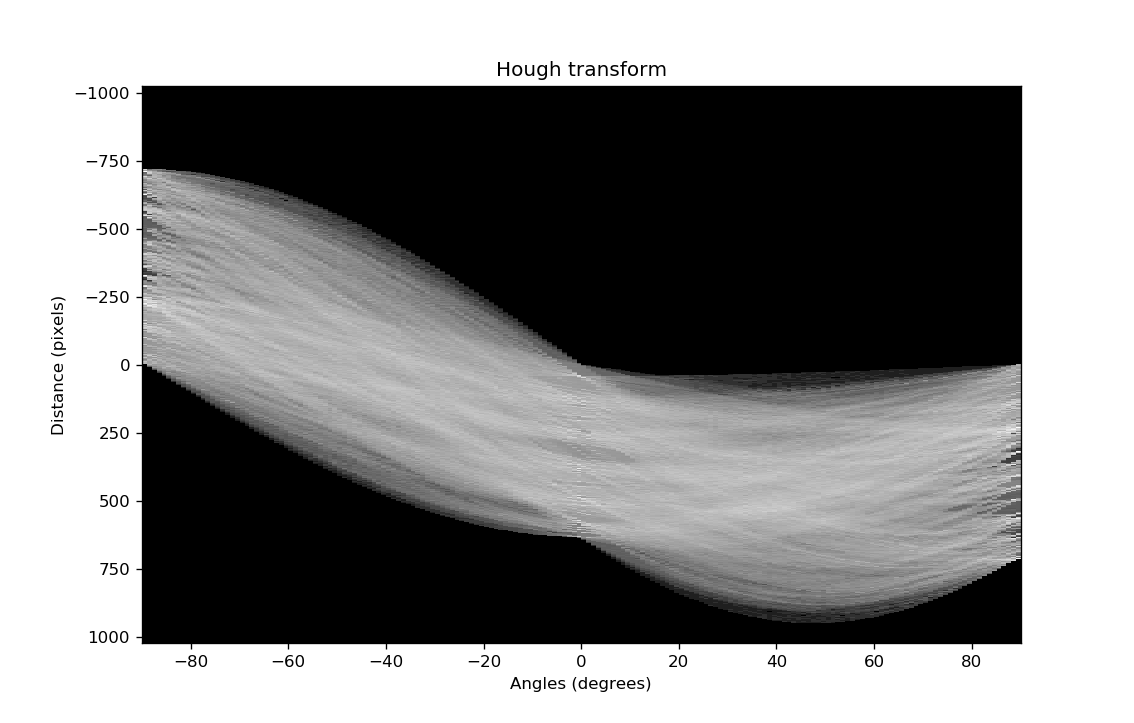

In [14]:
h, theta, d = hough_line(borders)

plt.figure()
plt.imshow(np.log(h+1), extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]], aspect='auto')
plt.title('Hough transform')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.show()

In [24]:
hpeaks, angles, dists = hough_line_peaks(h, theta, d, num_peaks=10)

In [25]:
print(hpeaks.shape)
print(angles.shape)
print(dists.shape)

(10,)
(10,)
(10,)


<IPython.core.display.Javascript object>


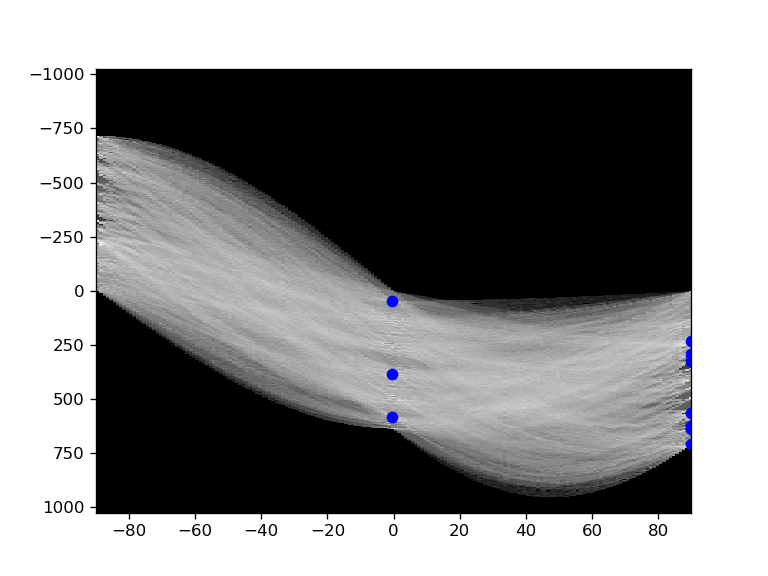

In [26]:
plt.figure()
plt.imshow(np.log(h+1),aspect='auto',extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[-1], d[0]])
plt.plot(np.rad2deg(angles),dists,'bo')
plt.show()

<IPython.core.display.Javascript object>


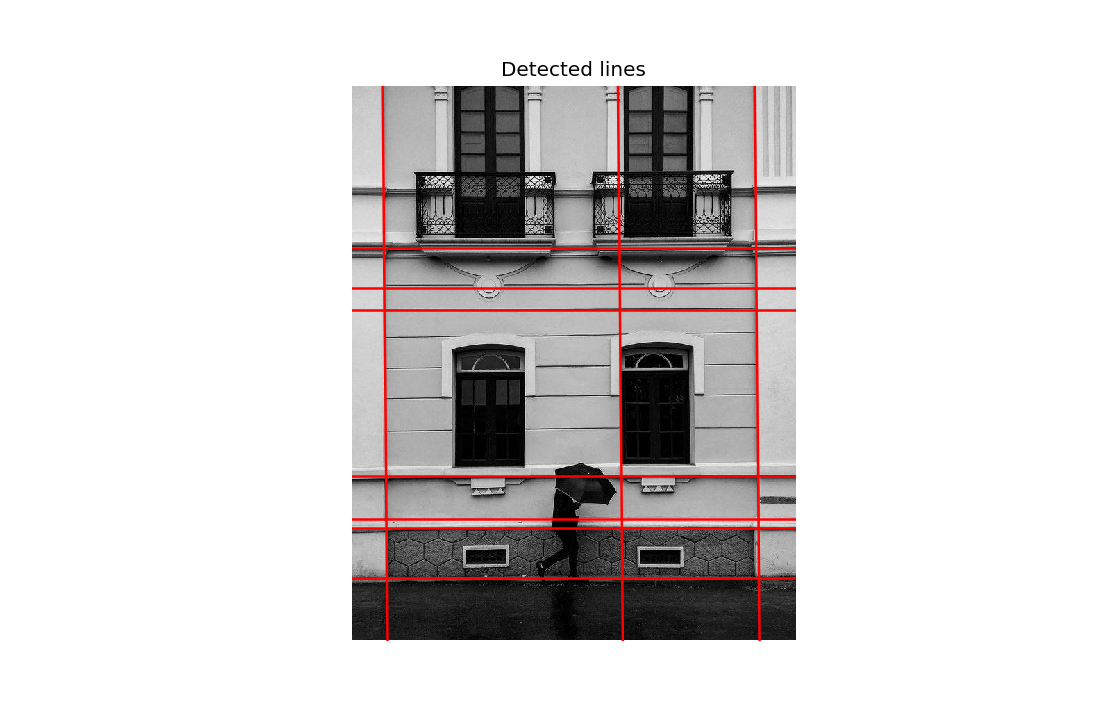

In [28]:
plt.figure()
plt.imshow(im, cmap=plt.cm.gray)

for i in range(len(hpeaks)):
    x0 = 0
    x1 = im.shape[1]
    y0 = (dists[i]-x0*np.cos(angles[i]))/np.sin(angles[i])
    y1 = (dists[i]-x1*np.cos(angles[i]))/np.sin(angles[i])
    plt.plot((x0,x1), (y0,y1), '-r')
    
plt.xlim((0,im.shape[1]))
plt.ylim((im.shape[0], 0))
plt.axis('off')
plt.title('Detected lines')
plt.show()